# Analisis Explorativo de Datos

In [419]:
import pandas as pd
import numpy as np
import numpy as df
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

------------------------------------------------------------------------------------------------
Carga de datos:

In [454]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip", sep=",")

------------------------------------------------------------------------------------------------
Seleccionar solo la localización de Sotavento:

In [455]:
sotavento_columns = [col for col in wind_ava.columns if ".13" in col]
sotavento_columns.insert(0, "datetime")
sotavento_columns.append("energy")
wind_ava_sotavento = wind_ava[sotavento_columns]

Se han descartado las columnas que no contenían información relevante para nuestro modelo. 
Dado que se nos pide analizar únicamente la ubicación de Sotavento, nos hemos centrado en estas columnas, reduciendo así el conjunto de datos de 552 a 24 columnas. 
Además, hemos considerado importantes las columnas *"energy"* y *"datetime"*, las cuales serán fundamentales para realizar predicciones en nuestro modelo.

In [456]:
wind_ava_sotavento = wind_ava_sotavento.rename(columns = {
    "energy": "Energy", 
    "datetime": "Datetime", 
    "p54.162.13": "Vertical integral of temperature", 
    "p55.162.13": "Vertical integral of water vapour", 
    "cape.13": "Convective available potential energy", 
    "p59.162.13": "Vertical integral of divergence of kinetic energy", 
    "lai_lv.13": "Leaf area index, low vegetation", 
    "lai_hv.13": "Leaf area index, high vegetation", 
    "u10n.13": "Neutral wind at 10 m u-component", 
    "v10n.13": "Neutral wind at 10 m v-component", 
    "sp.13": "Surface pressure",
    "stl1.13": "Soil temperature level 1",
    "u10.13": "10 metre U wind component",
    "v10.13": "10 metre V wind component",
    "t2m.13": "2 metre temperature", 
    "stl2.13": "Soil temperature level 2", 
    "stl3.13": "Soil temperature level 3", 
    "iews.13": "Instantaneous eastward turbulent surface stress",
    "inss.13": "Instantaneous northward turbulent surface", 
    "stl4.13": "Soil temperature level 4", 
    "fsr.13": "Forecast surface roughness", 
    "flsr.13": "Forecast logarithm of surface roughness for heat",
    "u100.13": "100 metre U wind component",
    "v100.13": "100 metre V wind component", })
wind_ava_sotavento.head()

Datetime  Vertical integral of temperature  \
0  2005-01-02 18:00:00                      2.510824e+06   
1  2005-01-03 00:00:00                      2.513173e+06   
2  2005-01-03 06:00:00                      2.509627e+06   
3  2005-01-03 12:00:00                      2.510571e+06   
4  2005-01-03 18:00:00                      2.505664e+06   

   Vertical integral of water vapour  Convective available potential energy  \
0                           9.186295                              13.527577   
1                           8.849569                               6.896412   
2                           7.924080                               4.774439   
3                           6.922709                               0.000000   
4                           6.646282                               0.000000   

   Vertical integral of divergence of kinetic energy  \
0                                       1.386937e+06   
1                                       1.153526e+06   
2                                       1.098754e+06   
3                                       1.076021e+06   
4                                       1.070830e+06   

   Leaf area index, low vegetation  Leaf area index, high vegetation  \
0                         2.344111                          2.432983   
1                         2.343719                          2.432838   
2                         2.343300                          2.432704   
3                         2.342830                          2.432514   
4                         2.342437                          2.432369   

   Neutral wind at 10 m u-component  Neutral wind at 10 m v-component  \
0                         -0.757587                         -1.922799   
1                         -1.412620                         -1.403011   
2                         -2.290185                         -0.754580   
3                         -3.497855                          1.271028   
4                         -0.971249                          0.553060   

   Surface pressure  ...  Soil temperature level 2  Soil temperature level 3  \
0      99846.319914  ...                281.042026                281.462478   
1      99917.733093  ...                280.747406                281.486541   
2      99764.378681  ...                280.114863                281.487095   
3      99672.670459  ...                279.991138                281.472435   
4      99372.811211  ...                280.576898                281.473265   

   Instantaneous eastward turbulent surface stress  \
0                                        -0.057958   
1                                        -0.103576   
2                                        -0.165721   
3                                        -0.275550   
4                                        -0.056553   

   Instantaneous northward turbulent surface  Soil temperature level 4  \
0                                  -0.138650                284.684755   
1                                  -0.083050                284.667948   
2                                  -0.036241                284.651914   
3                                   0.098192                284.636266   
4                                   0.041844                284.620232   

   Forecast surface roughness  \
0                    0.404731   
1                    0.404920   
2                    0.405704   
3                    0.403967   
4                    0.403808   

   Forecast logarithm of surface roughness for heat  \
0                                         -5.927092   
1                                         -5.913881   
2                                         -5.908272   
3                                         -5.961995   
4                                         -5.987860   

   100 metre U wind component  100 metre V wind component   Energy  
0                   -1.780562                   -4.443617   402.71  
1                   -3.743344                   -3

------------------------------------------------------------------------------------------------
Tipos de datos:

In [457]:
wind_ava_sotavento["Datetime"] = pd.to_datetime(wind_ava_sotavento["Datetime"])
wind_ava_sotavento.dtypes

Datetime                                             datetime64[ns]
Vertical integral of temperature                            float64
Vertical integral of water vapour                           float64
Convective available potential energy                       float64
Vertical integral of divergence of kinetic energy           float64
Leaf area index, low vegetation                             float64
Leaf area index, high vegetation                            float64
Neutral wind at 10 m u-component                            float64
Neutral wind at 10 m v-component                            float64
Surface pressure                                            float64
Soil temperature level 1                                    float64
10 metre U wind component                                   float64
10 metre V wind component                                   float64
2 metre temperature                                         float64
Soil temperature level 2                        

Se ha convertido el tipo de datos de la columna "Datetime" de object a datetime. Después de la conversión, ya se pueden realizar operaciones de fecha y tiempo sobre esta columna, puesto que está en el formato adecuado.

------------------------------------------------------------------------------------------------
Forma del conjunto de datos:

In [424]:
wind_ava_sotavento.shape

(4748, 24)

In [425]:
duplicate_rows = wind_ava_sotavento[wind_ava_sotavento.duplicated()]
print("Número de filas duplicadas: ", duplicate_rows.shape)

Número de filas duplicadas:  (0, 24)


In [426]:
null_rows = wind_ava_sotavento[wind_ava_sotavento.isnull().any(axis=1)]
print("Número de filas nulas: ", null_rows.shape)

Número de filas nulas:  (0, 24)


In [427]:
keys = wind_ava_sotavento.keys()

keys_x = []
keys_data = []

for i in keys:
  if i != 'Energy':
    keys_x.append(i)
  keys_data.append(i)

X = wind_ava_sotavento[keys_x].values
Y = wind_ava_sotavento['Energy'].values

wind_ava_sotavento.describe()

Datetime  Vertical integral of temperature  \
count                           4748                      4.748000e+03   
mean   2007-02-20 00:43:40.387531520                      2.489477e+06   
min              2005-01-02 18:00:00                      2.358748e+06   
25%              2005-12-11 04:30:00                      2.458543e+06   
50%              2006-11-18 15:00:00                      2.490478e+06   
75%              2007-12-03 07:30:00                      2.525134e+06   
max              2009-12-31 18:00:00                      2.580387e+06   
std                              NaN                      4.482599e+04   

       Vertical integral of water vapour  \
count                        4748.000000   
mean                           16.008810   
min                             1.650268   
25%                            11.203264   
50%                            15.543441   
75%                            20.214077   
max                            39.230807   
std                             6.552216   

       Convective available potential energy  \
count                            4748.000000   
mean                               31.166541   
min                                 0.000000   
25%                                 0.000000   
50%                                 1.004148   
75%                                14.143328   
max                              2311.662152   
std                               121.758977   

       Vertical integral of divergence of kinetic energy  \
count                                       4.748000e+03   
mean                                        1.706692e+06   
min                                         5.610341e+04   
25%                                         6.563209e+05   
50%                                         1.239176e+06   
75%                                         2.296548e+06   
max                                         1.110694e+07   
std                                         1.466953e+06   

       Leaf area index, low vegetation  Leaf area index, high vegetation  \
count                      4748.000000                       4748.000000   
mean                          2.815222                          2.576284   
min                           2.323973                          2.425866   
25%                           2.425944                          2.461630   
50%                           2.758857                          2.560520   
75%                           3.205385                          2.688526   
max                           3.450745                          2.762992   
std                           0.397377                          0.116434   

       Neutral wind at 10 m u-component  Neutral wind at 10 m v-component  \
count                       4748.000000                       4748.000000   
mean                           0.386215                          0.120528   
min                           -8.619823                         -8.867441   
25%                           -1.950008                         -2.050920   
50%                            0.048820                         -0.191853   
75%                            2.641779                          2.016289   
max                           12.974802                         11.699814   
std                            3.100583                          3.016766   

       Surface pressure  ...  Soil temperature level 2  \
count       4748.000000  ...               4748.000000   
mean       97820.301287  ...                286.663838   
min        93770.364813  ...                275.461648   
25%        97459.369264  ...                282.287394   
50%        97861.147677  ...                286.191880   
75%        98251.478418  ...                291.345311   
max        99917.733093  ...                299.556292   
std          713.689654  ...                  5.547947   

       Soil temperature level 3  \
count               4748.000000   
mean              

In [428]:
wind_ava_sotavento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Datetime                                           4748 non-null   datetime64[ns]
 1   Vertical integral of temperature                   4748 non-null   float64       
 2   Vertical integral of water vapour                  4748 non-null   float64       
 3   Convective available potential energy              4748 non-null   float64       
 4   Vertical integral of divergence of kinetic energy  4748 non-null   float64       
 5   Leaf area index, low vegetation                    4748 non-null   float64       
 6   Leaf area index, high vegetation                   4748 non-null   float64       
 7   Neutral wind at 10 m u-component                   4748 non-null   float64       
 8   Neutral wind at 10

<Axes: xlabel='Energy'>

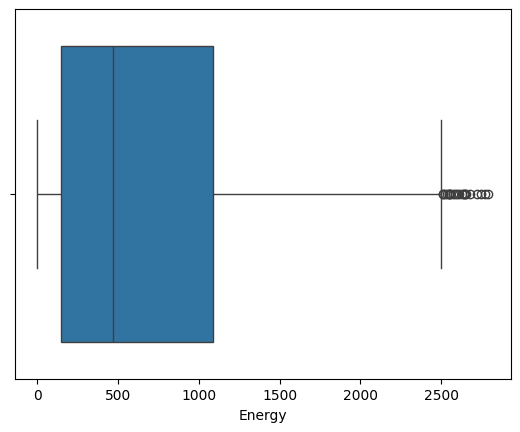

In [429]:
sns.boxplot(x=wind_ava_sotavento["Energy"])

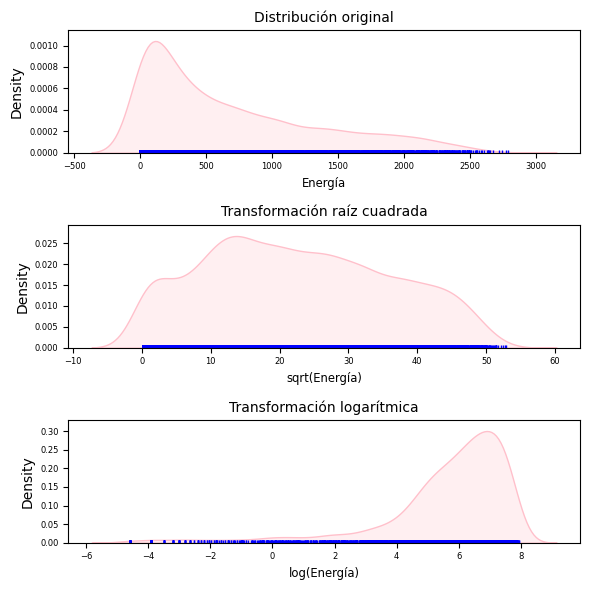

In [430]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(wind_ava_sotavento['Energy'], fill = True, color = "pink", ax = axes[0])
sns.rugplot(wind_ava_sotavento['Energy'], color = "blue", ax = axes[0])
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Energía', fontsize='small')
axes[0].tick_params(labelsize = 6)

sns.kdeplot(np.sqrt(wind_ava_sotavento['Energy']), fill = True, color = "pink", ax = axes[1])
sns.rugplot(np.sqrt(wind_ava_sotavento['Energy']), color = "blue", ax = axes[1])
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Energía)', fontsize='small')
axes[1].tick_params(labelsize = 6)

sns.kdeplot(np.log(wind_ava_sotavento['Energy']), fill = True, color = "pink", ax = axes[2])
sns.rugplot(np.log(wind_ava_sotavento['Energy']), color = "blue", ax = axes[2])
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(Energía)', fontsize='small')
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

Text(0.5, 0.98, 'Diagrama de caja')

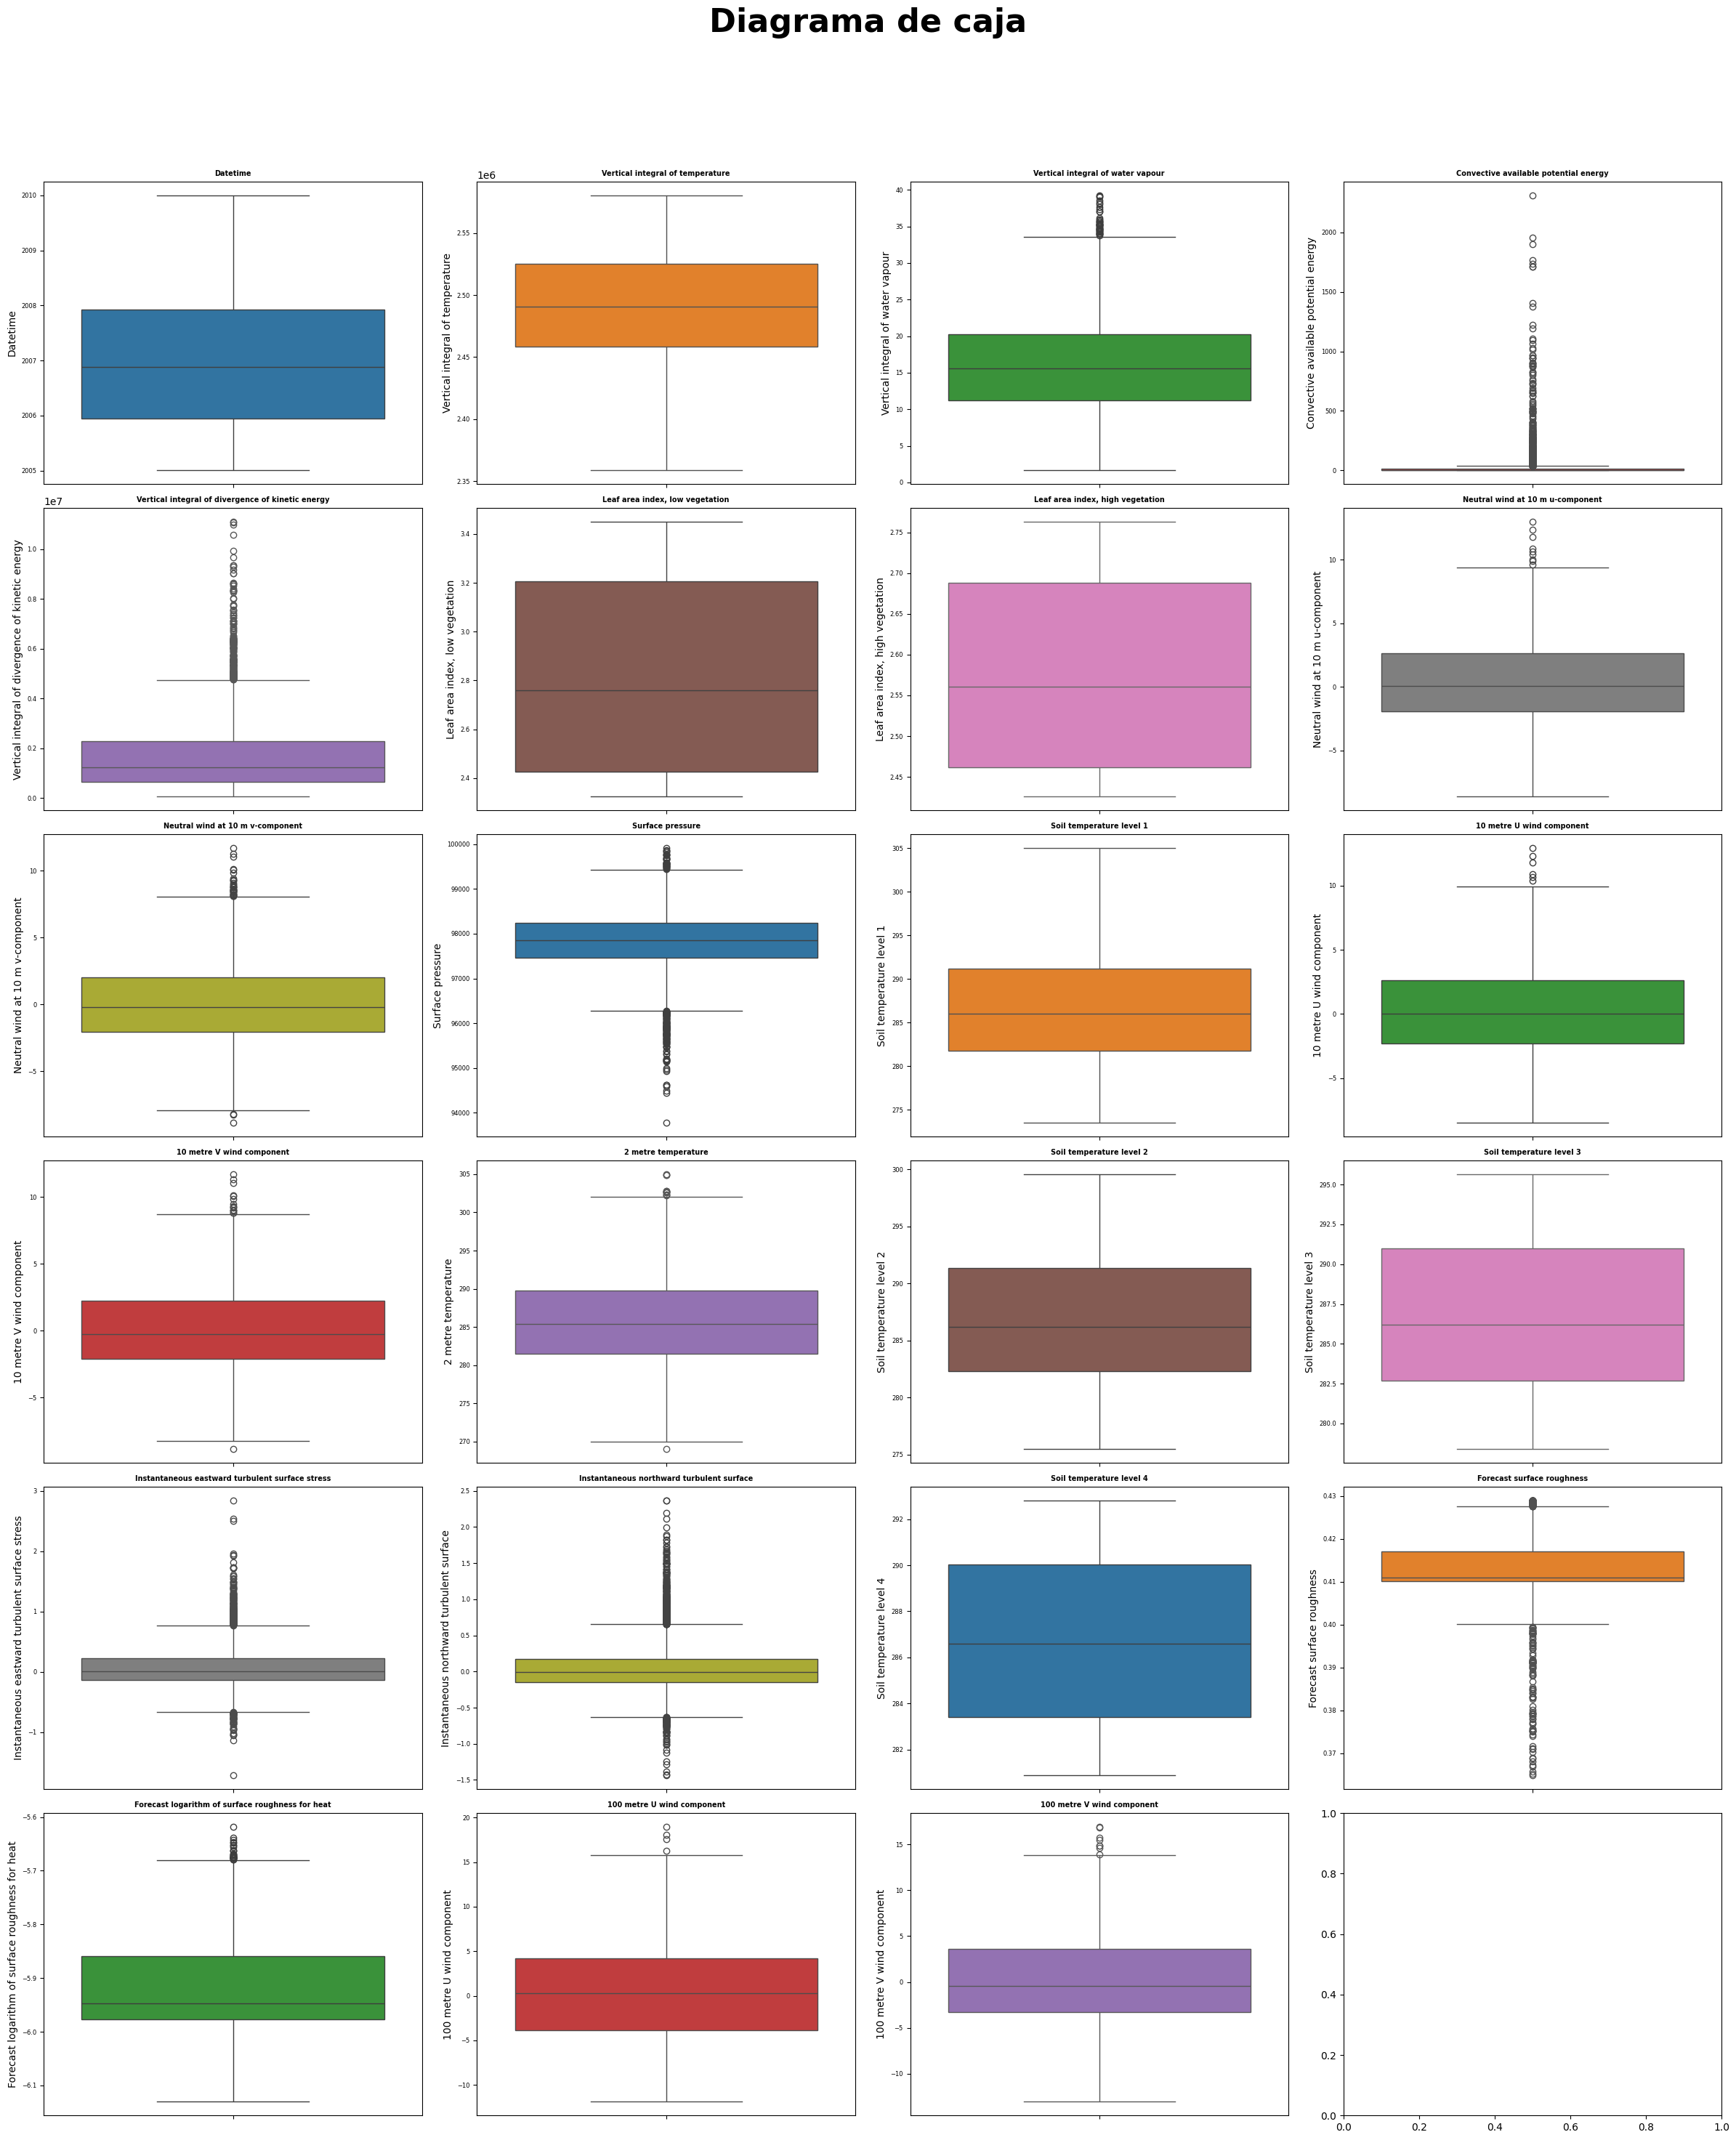

In [431]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(24, 30))
axes = axes.flat

for i, column in enumerate(keys_x):
    sns.boxplot(
        data     = wind_ava_sotavento[column],
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i%9]["color"],
        ax       = axes[i]
    )
    axes[i].set_title(column, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagrama de caja', fontsize=32, fontweight="bold")

Text(0.5, 0.98, 'Distribución parámetros')

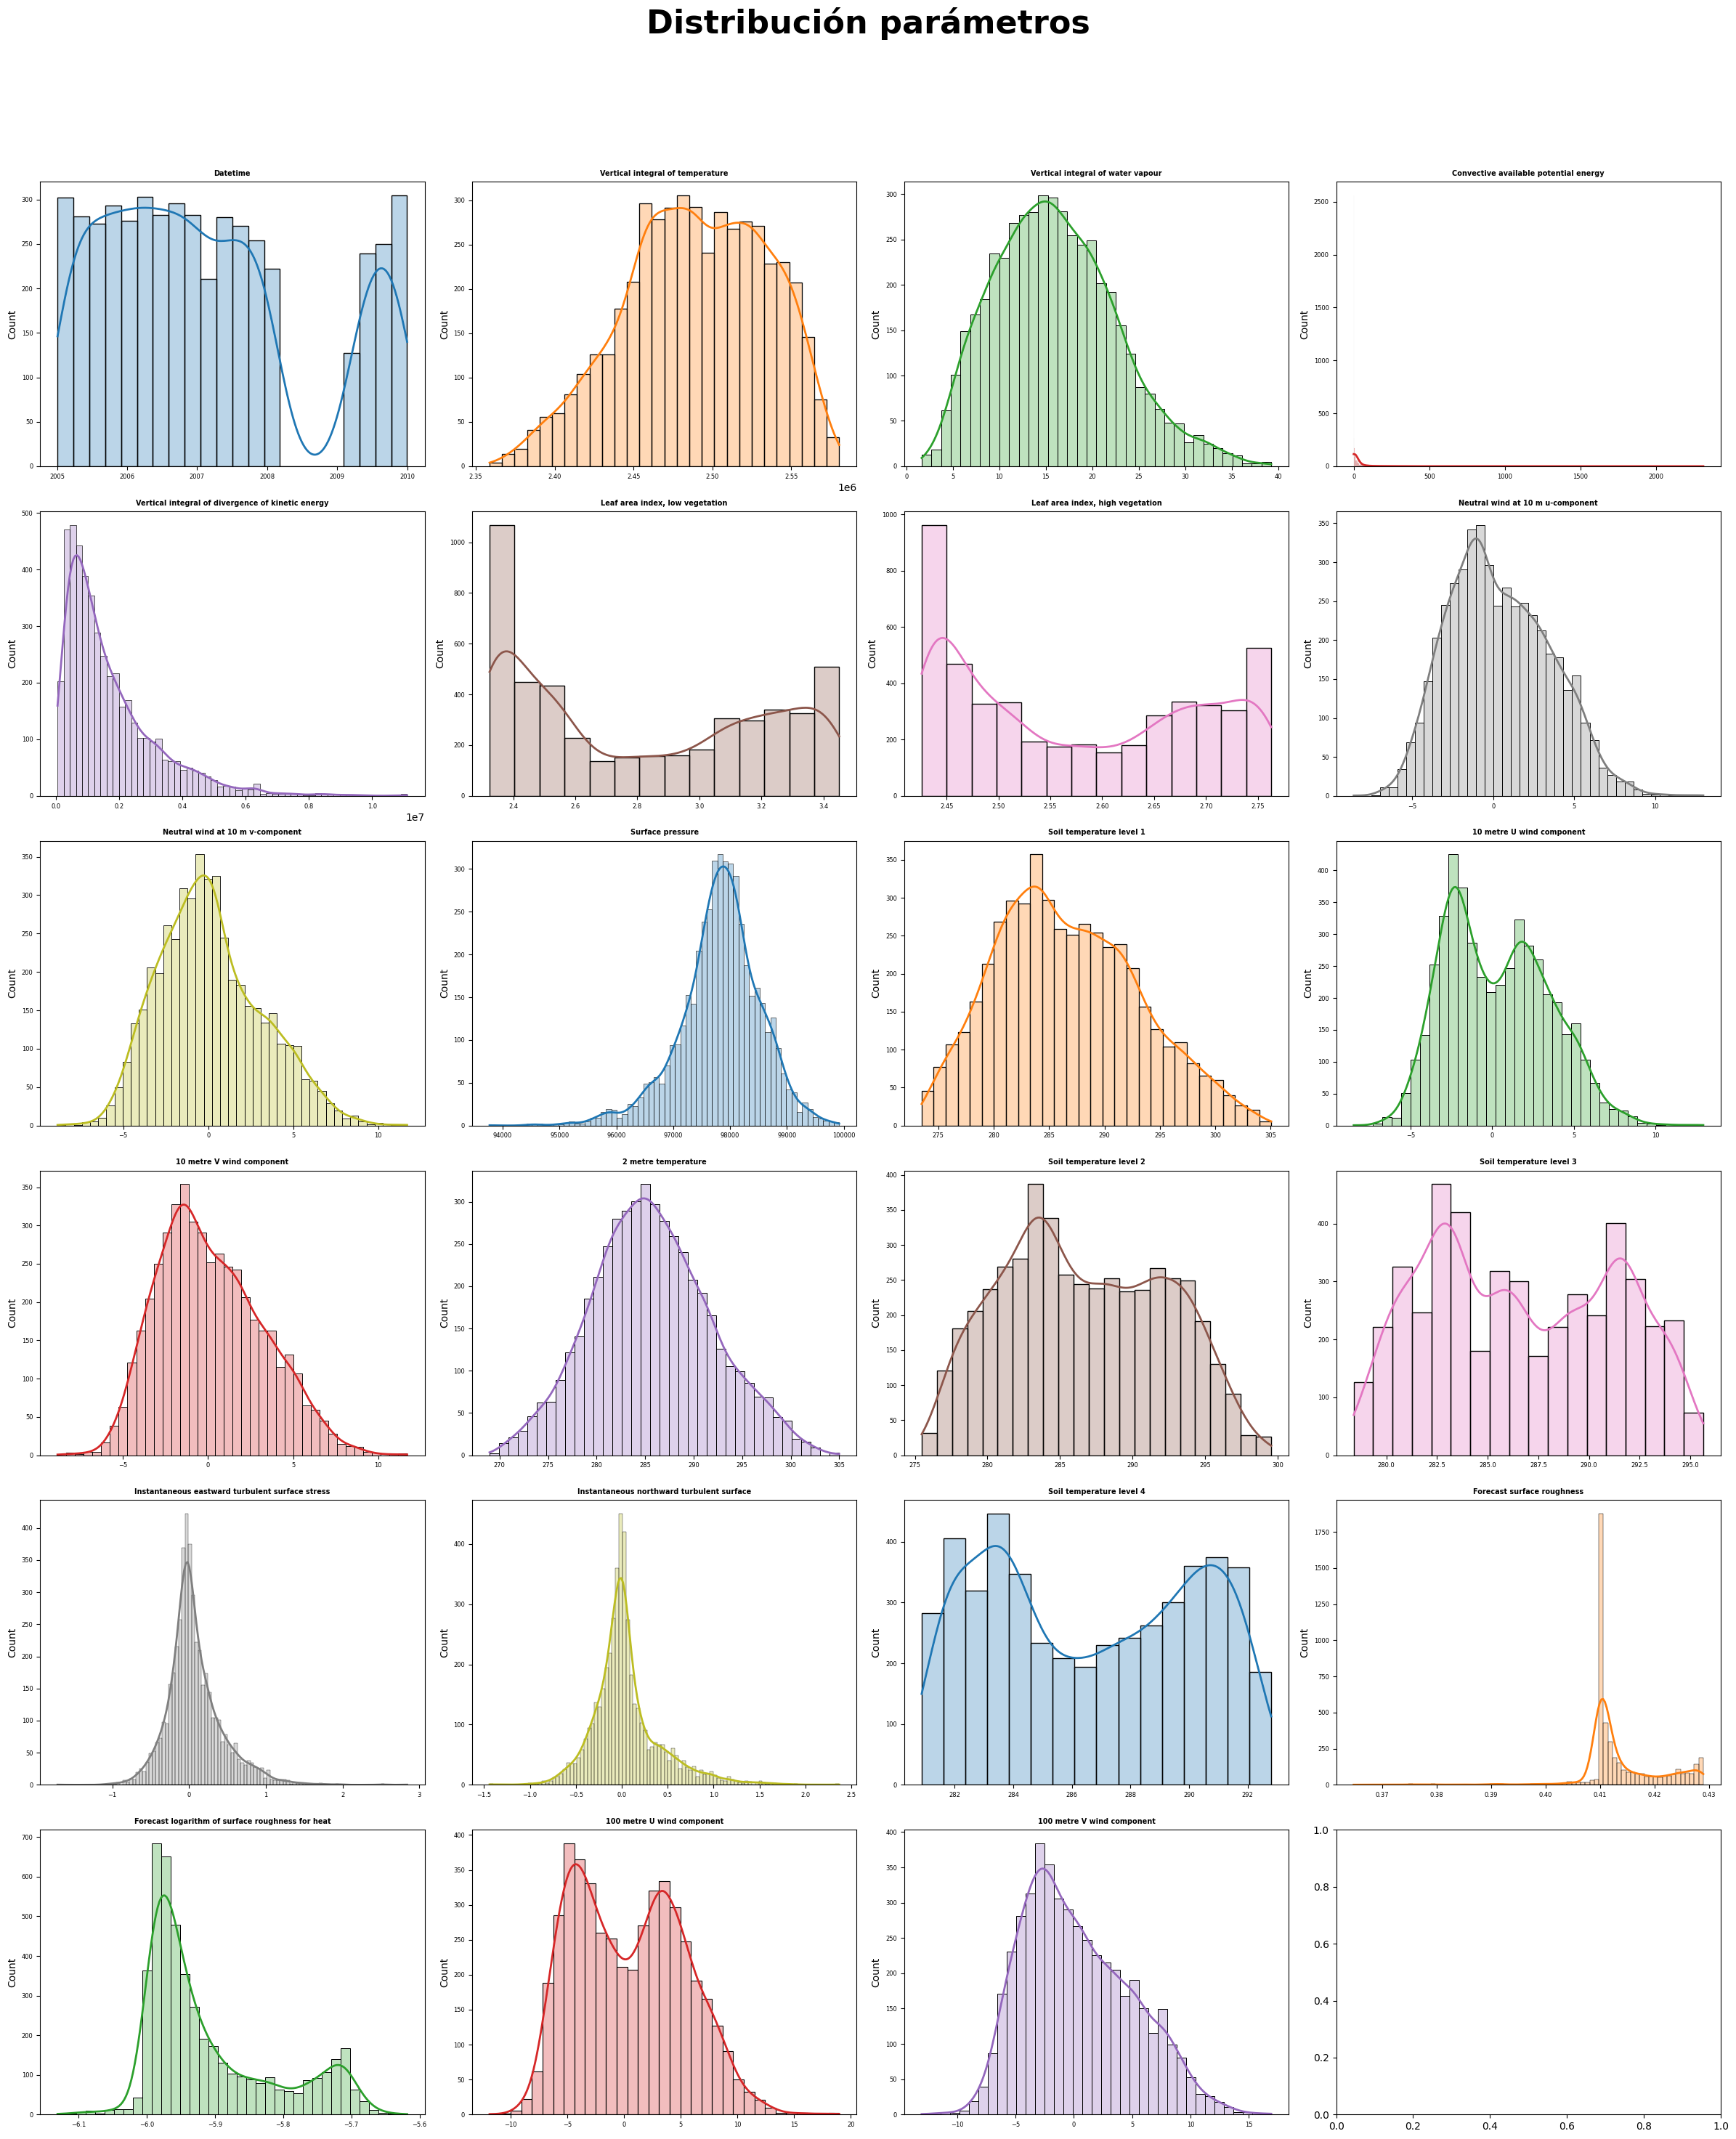

In [432]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(24, 30))
axes = axes.flat

for i, colum in enumerate(keys_x):
    sns.histplot(
        data     = wind_ava_sotavento[colum],
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i%9]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución parámetros', fontsize = 32, fontweight = "bold")

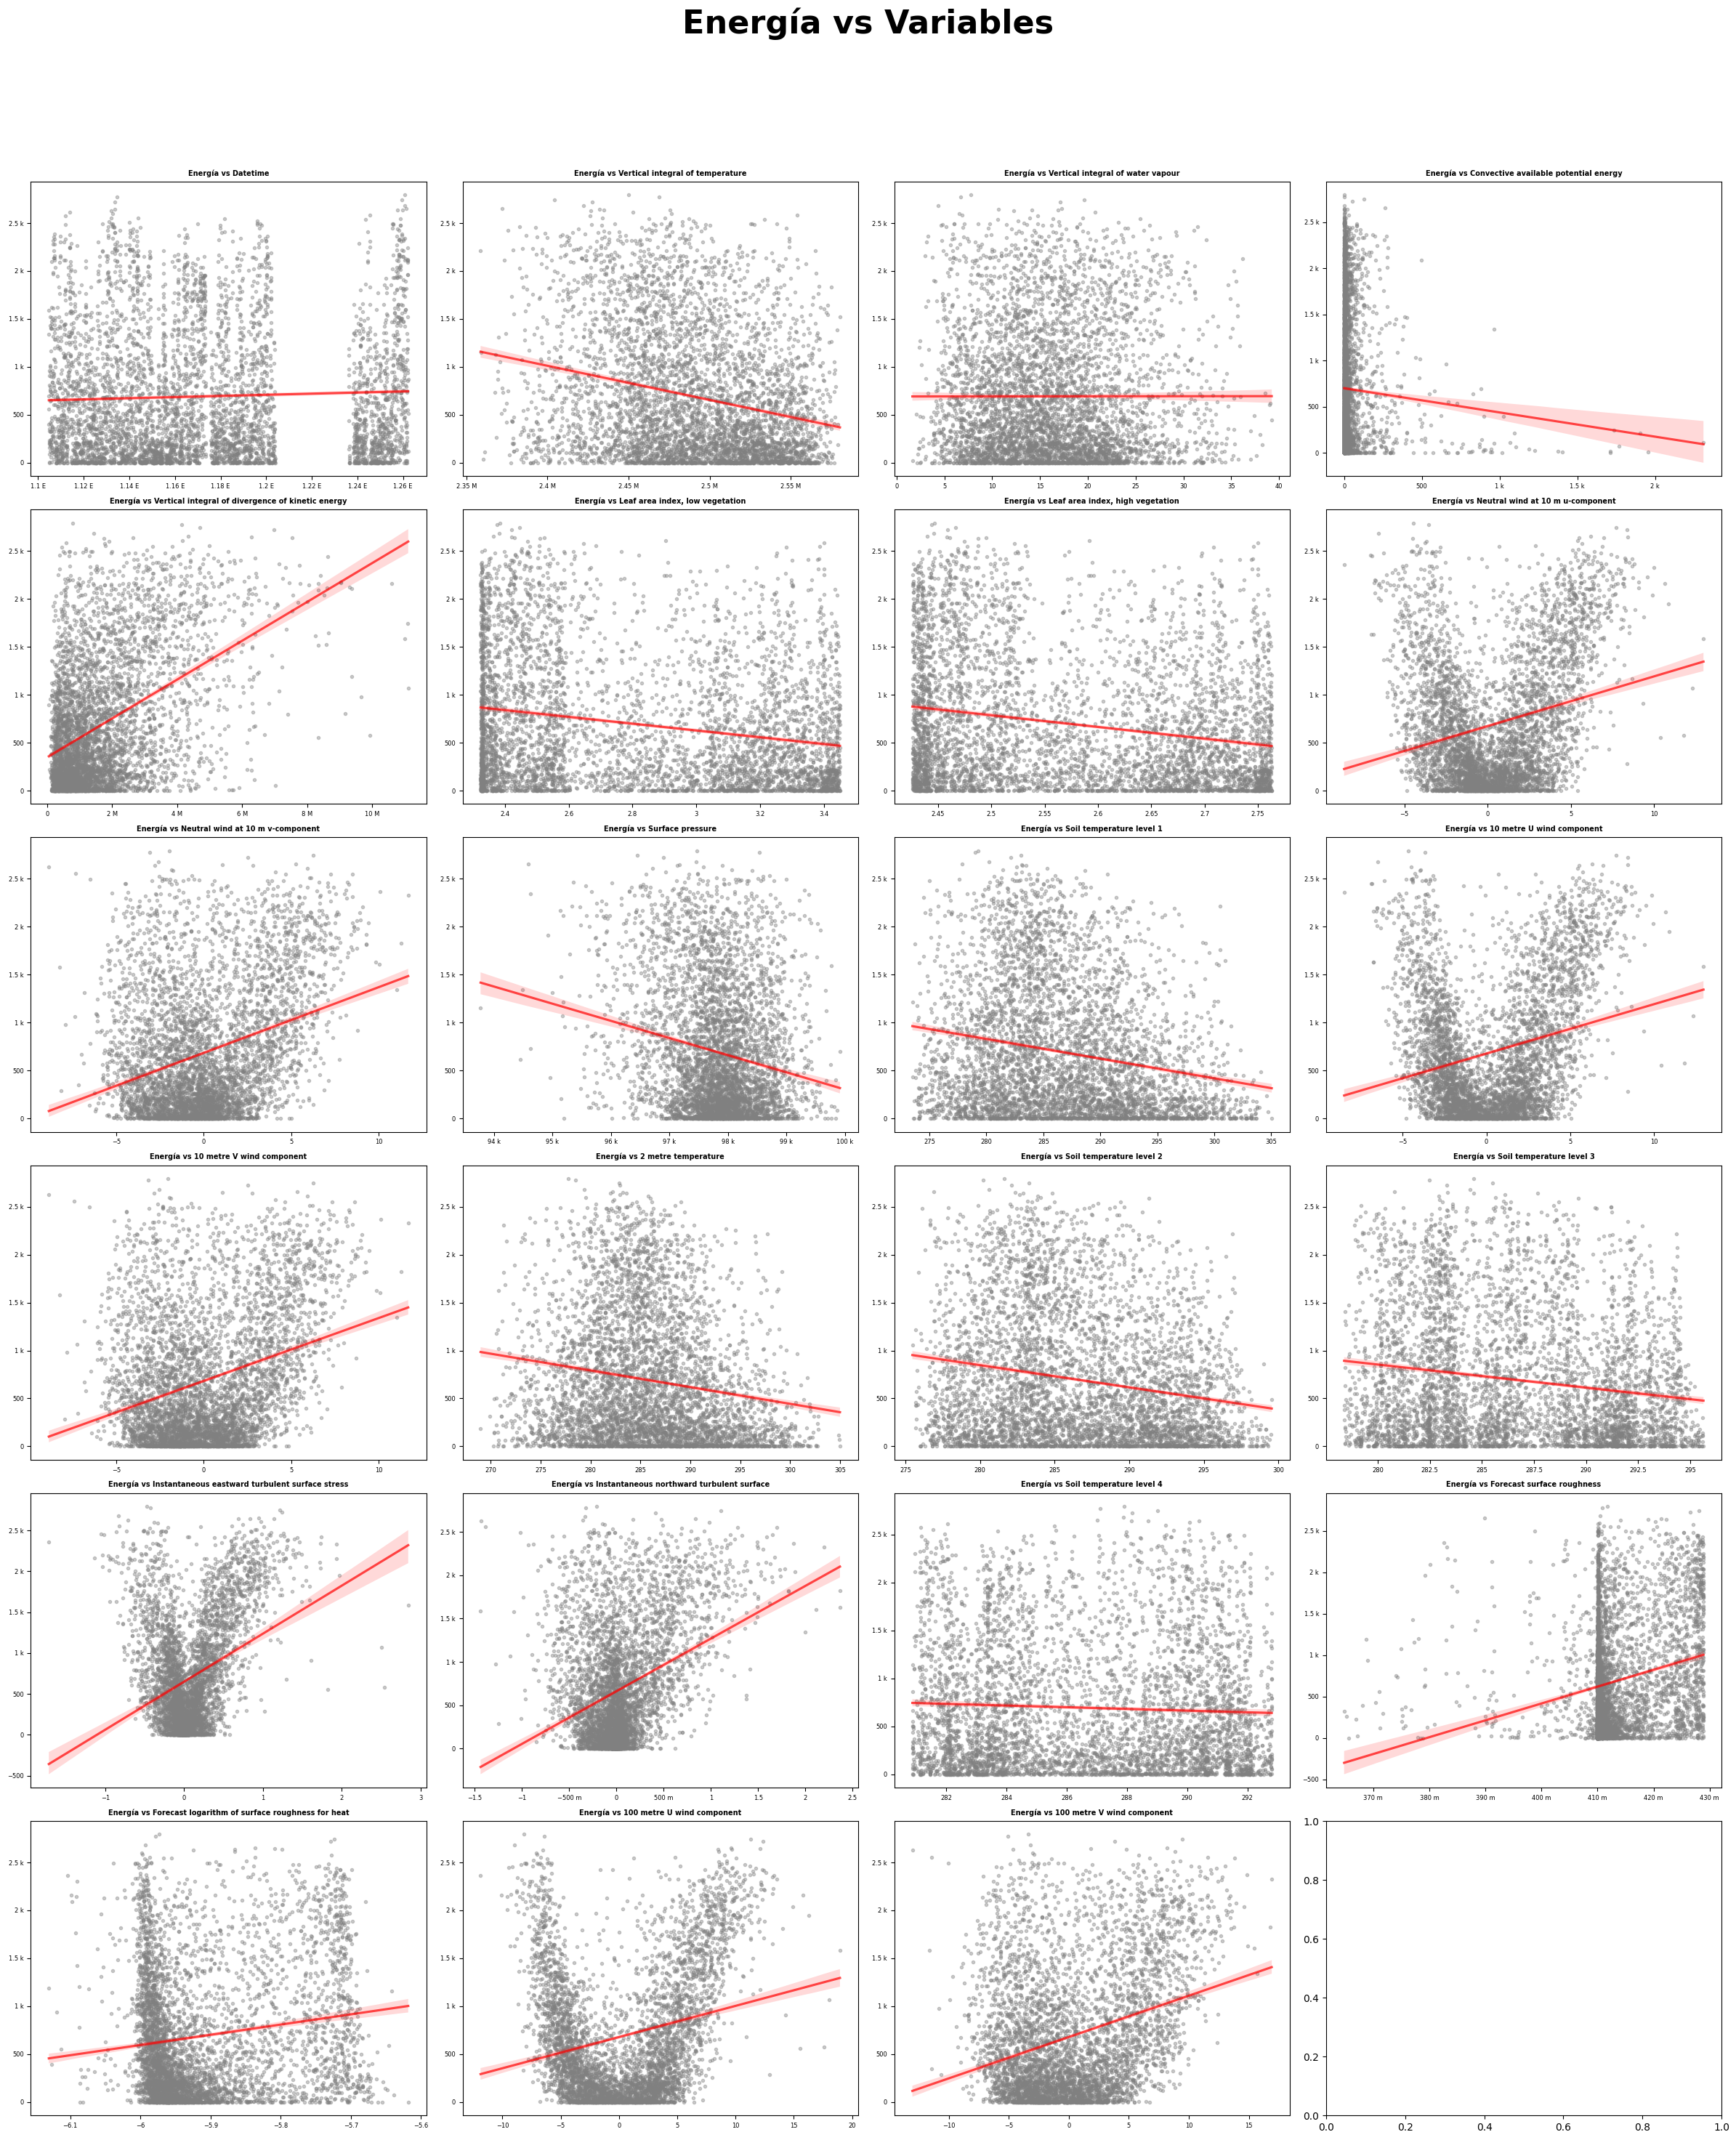

In [433]:
for column in keys_x:
    wind_ava_sotavento[column] = pd.to_numeric(wind_ava_sotavento[column])

# Crear el gráfico de regresión
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(24, 30))
axes = axes.flat

for i, column in enumerate(keys_x):
    sns.regplot(
        x           = wind_ava_sotavento[column],
        y           = wind_ava_sotavento['Energy'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Energía vs {column}", fontsize = 7, fontweight = "bold")
    axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Energía vs Variables', fontsize = 32, fontweight = "bold")
plt.show()

In [408]:
print(wind_ava_sotavento[column].shape)
print(wind_ava_sotavento['Energy'].shape)

(4748,)
(4748,)


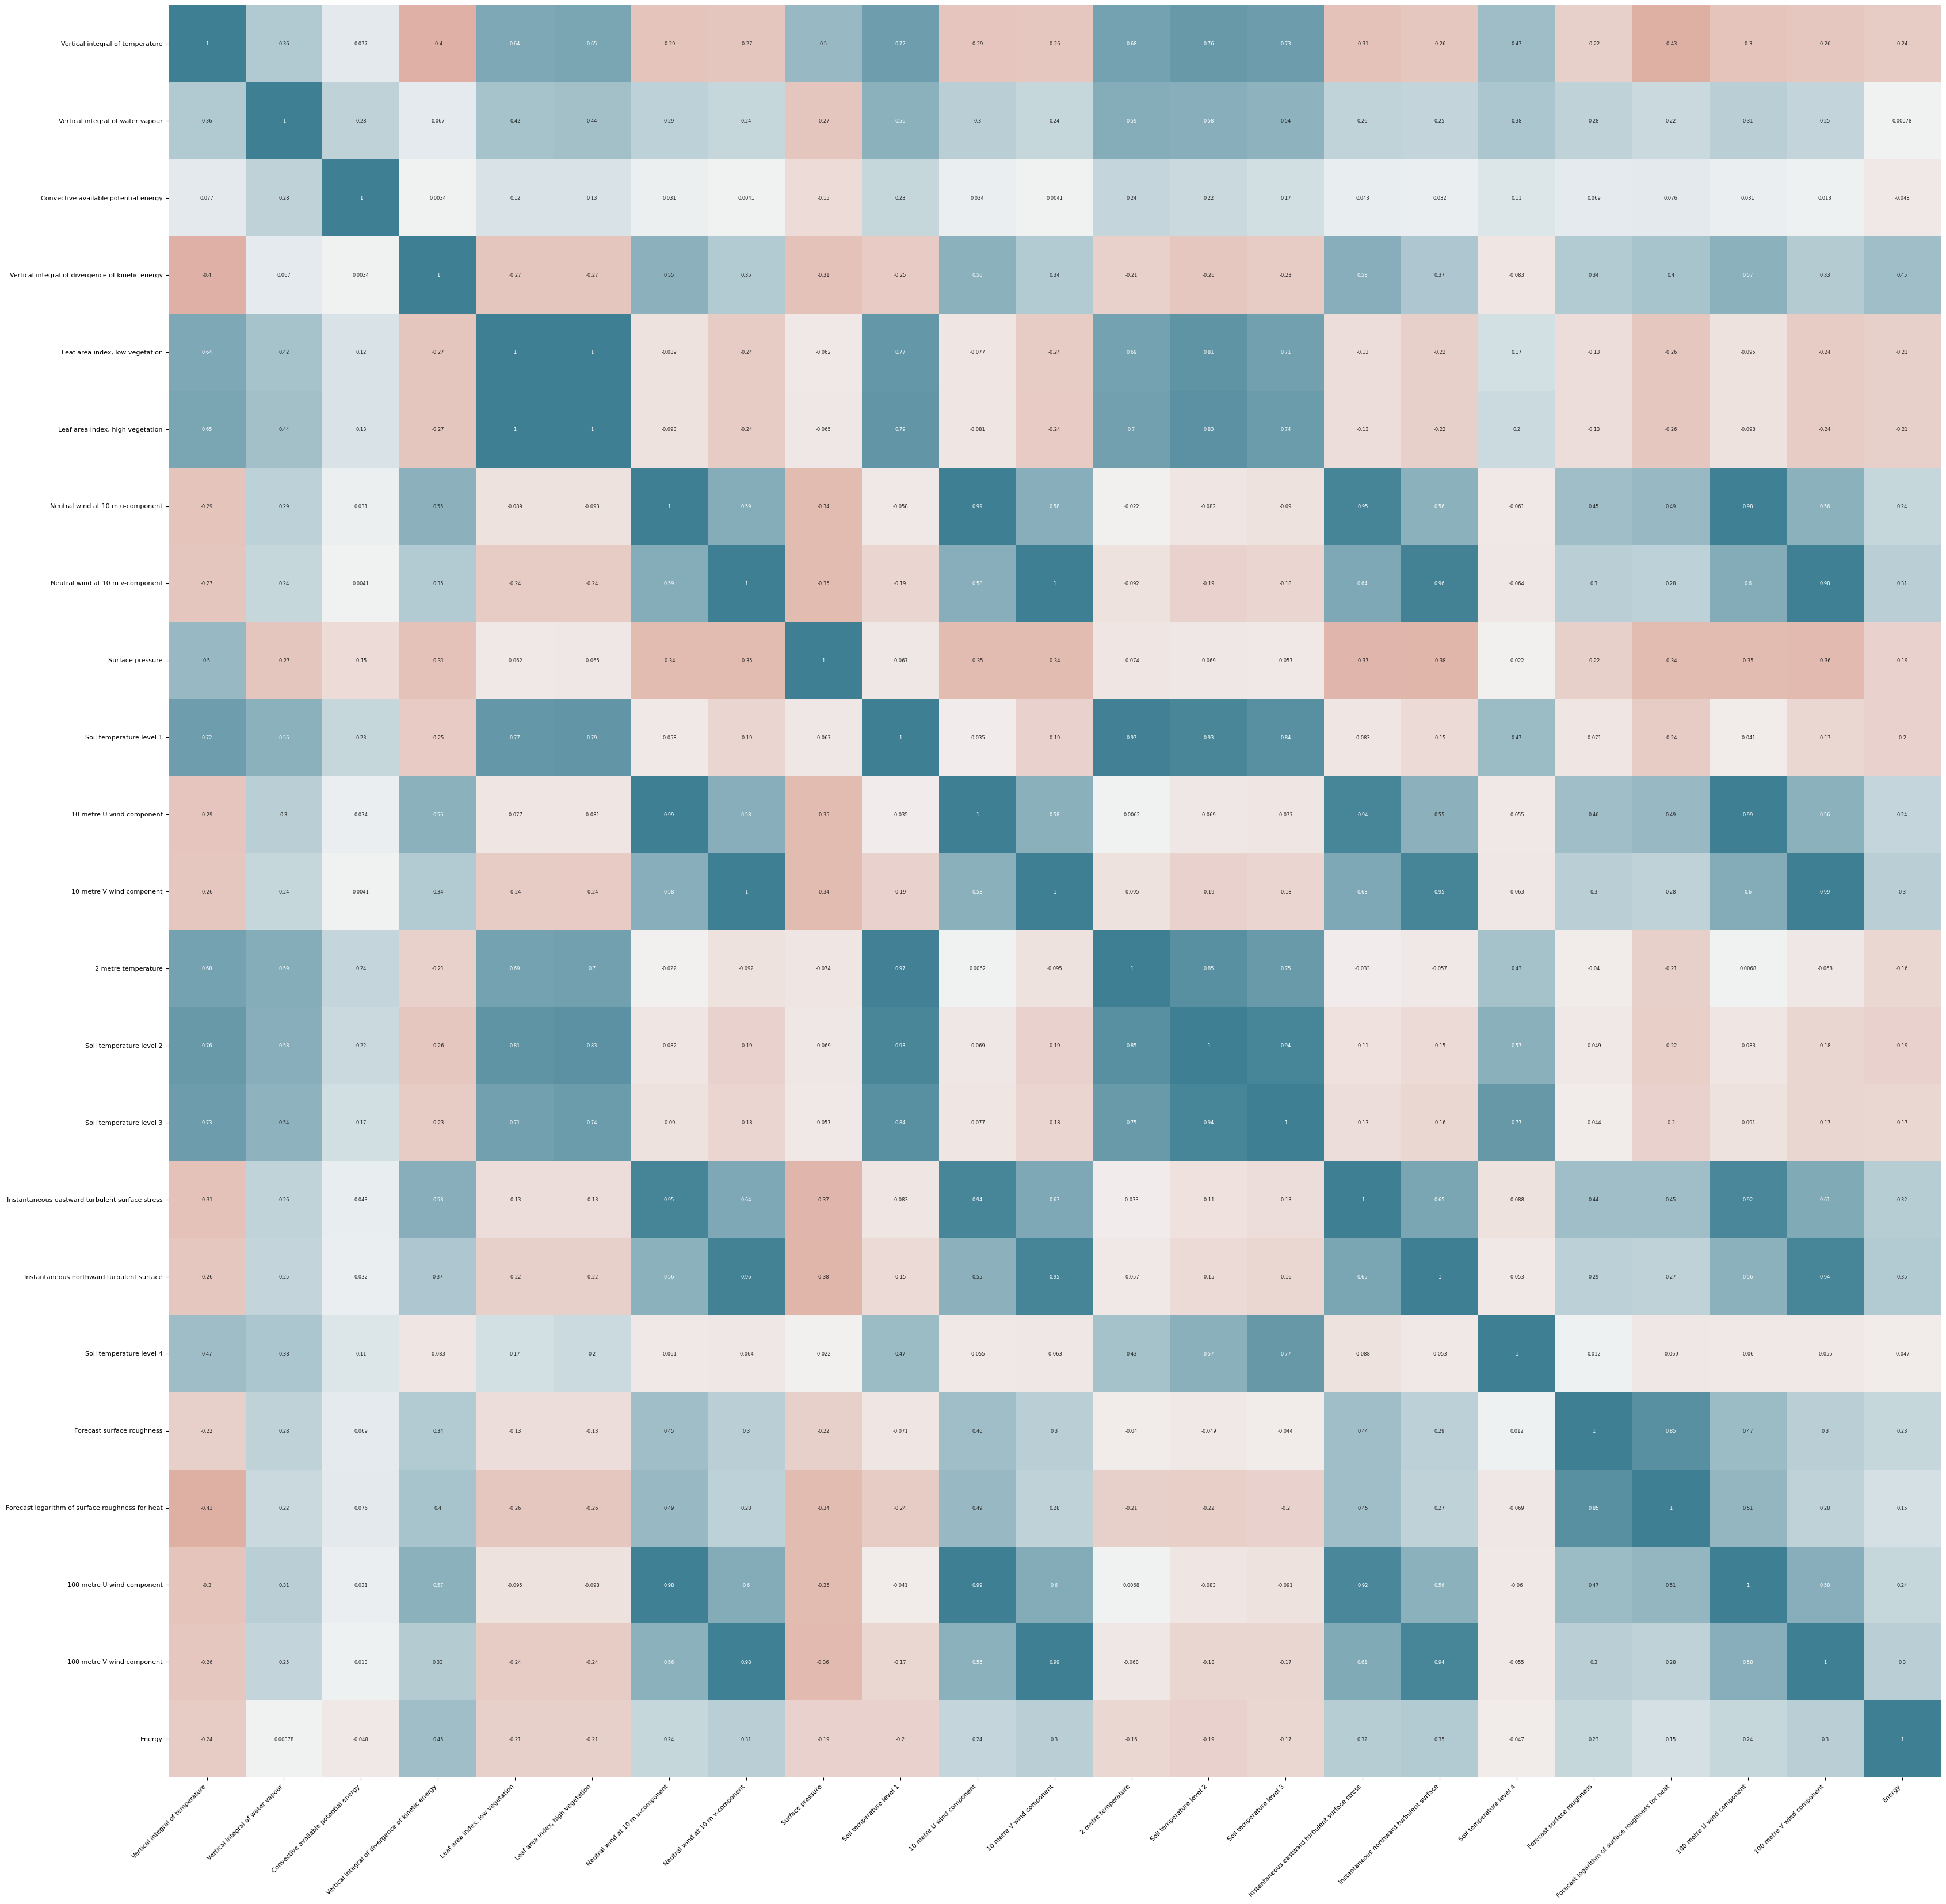

In [436]:
def tidy_corr_matrix(matrix):
    matrix = matrix.stack().reset_index()
    matrix.columns = ['variable_1','variable_2','r']
    matrix = matrix.loc[matrix['variable_1'] != matrix['variable_2'], :]
    matrix['abs_r'] = np.abs(matrix['r'])
    matrix = matrix.sort_values('abs_r', ascending=False)
    return (matrix)

matrix_corr = wind_ava_sotavento.select_dtypes(include=[ 'float64','datetime64[ns]']).corr(method='pearson')
tidy_corr_matrix(matrix_corr)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(40, 40))

sns.heatmap(
    matrix_corr,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [440]:
wind_ava_sotavento.info()
wind_ava_sotavento["Datetime"] = pd.to_datetime(wind_ava_sotavento["Datetime"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Datetime                                           4748 non-null   datetime64[ns]
 1   Vertical integral of temperature                   4748 non-null   float64       
 2   Vertical integral of water vapour                  4748 non-null   float64       
 3   Convective available potential energy              4748 non-null   float64       
 4   Vertical integral of divergence of kinetic energy  4748 non-null   float64       
 5   Leaf area index, low vegetation                    4748 non-null   float64       
 6   Leaf area index, high vegetation                   4748 non-null   float64       
 7   Neutral wind at 10 m u-component                   4748 non-null   float64       
 8   Neutral wind at 10

In [441]:
matrix_corr = wind_ava_sotavento.select_dtypes(include=[ 'float64','datetime64[ns]']).corr(method='pearson')
num_related = {}
param_excluded = []

for i in keys_x:
  num_related[i] = 0
related_params = []

for i in keys_x:
  for j in keys_x:
    if i !=j and (matrix_corr[i][j] >= 0.95 or matrix_corr[i][j] <= -0.95):
      params = [i,j]
      num_related[i] +=1
      related_params.append(params)
print(related_params)
print(num_related)
for i in keys_x:
  if num_related[i] == 0:
    num_related.pop(i)
print(num_related)
print(len(num_related.keys()))

def max_related(num_related):
    max= 0
    for i in num_related.keys():
      if num_related[i] > max:
        max = num_related[i]
    return list(num_related.keys())[list(num_related.values()).index(max)]

while len(related_params) != 0:
  max_related_num = max_related(num_related)
  print(max_related_num)
  param_excluded.append(max_related_num)
  num_related.pop(max_related_num)
  related_params = []

  for i in num_related.keys():
    for j in num_related.keys():
      if i !=j and (matrix_corr[i][j] >= 0.95 or matrix_corr[i][j] <= -0.95):
        params = [i,j]
        related_params.append(params)
  print(related_params)
  print(len(related_params))

print(len(param_excluded))
print(param_excluded)

[['Leaf area index, low vegetation', 'Leaf area index, high vegetation'], ['Leaf area index, high vegetation', 'Leaf area index, low vegetation'], ['Neutral wind at 10 m u-component', '10 metre U wind component'], ['Neutral wind at 10 m u-component', '100 metre U wind component'], ['Neutral wind at 10 m v-component', '10 metre V wind component'], ['Neutral wind at 10 m v-component', 'Instantaneous northward turbulent surface'], ['Neutral wind at 10 m v-component', '100 metre V wind component'], ['Soil temperature level 1', '2 metre temperature'], ['10 metre U wind component', 'Neutral wind at 10 m u-component'], ['10 metre U wind component', '100 metre U wind component'], ['10 metre V wind component', 'Neutral wind at 10 m v-component'], ['10 metre V wind component', '100 metre V wind component'], ['2 metre temperature', 'Soil temperature level 1'], ['Instantaneous northward turbulent surface', 'Neutral wind at 10 m v-component'], ['100 metre U wind component', 'Neutral wind at 10 m u-

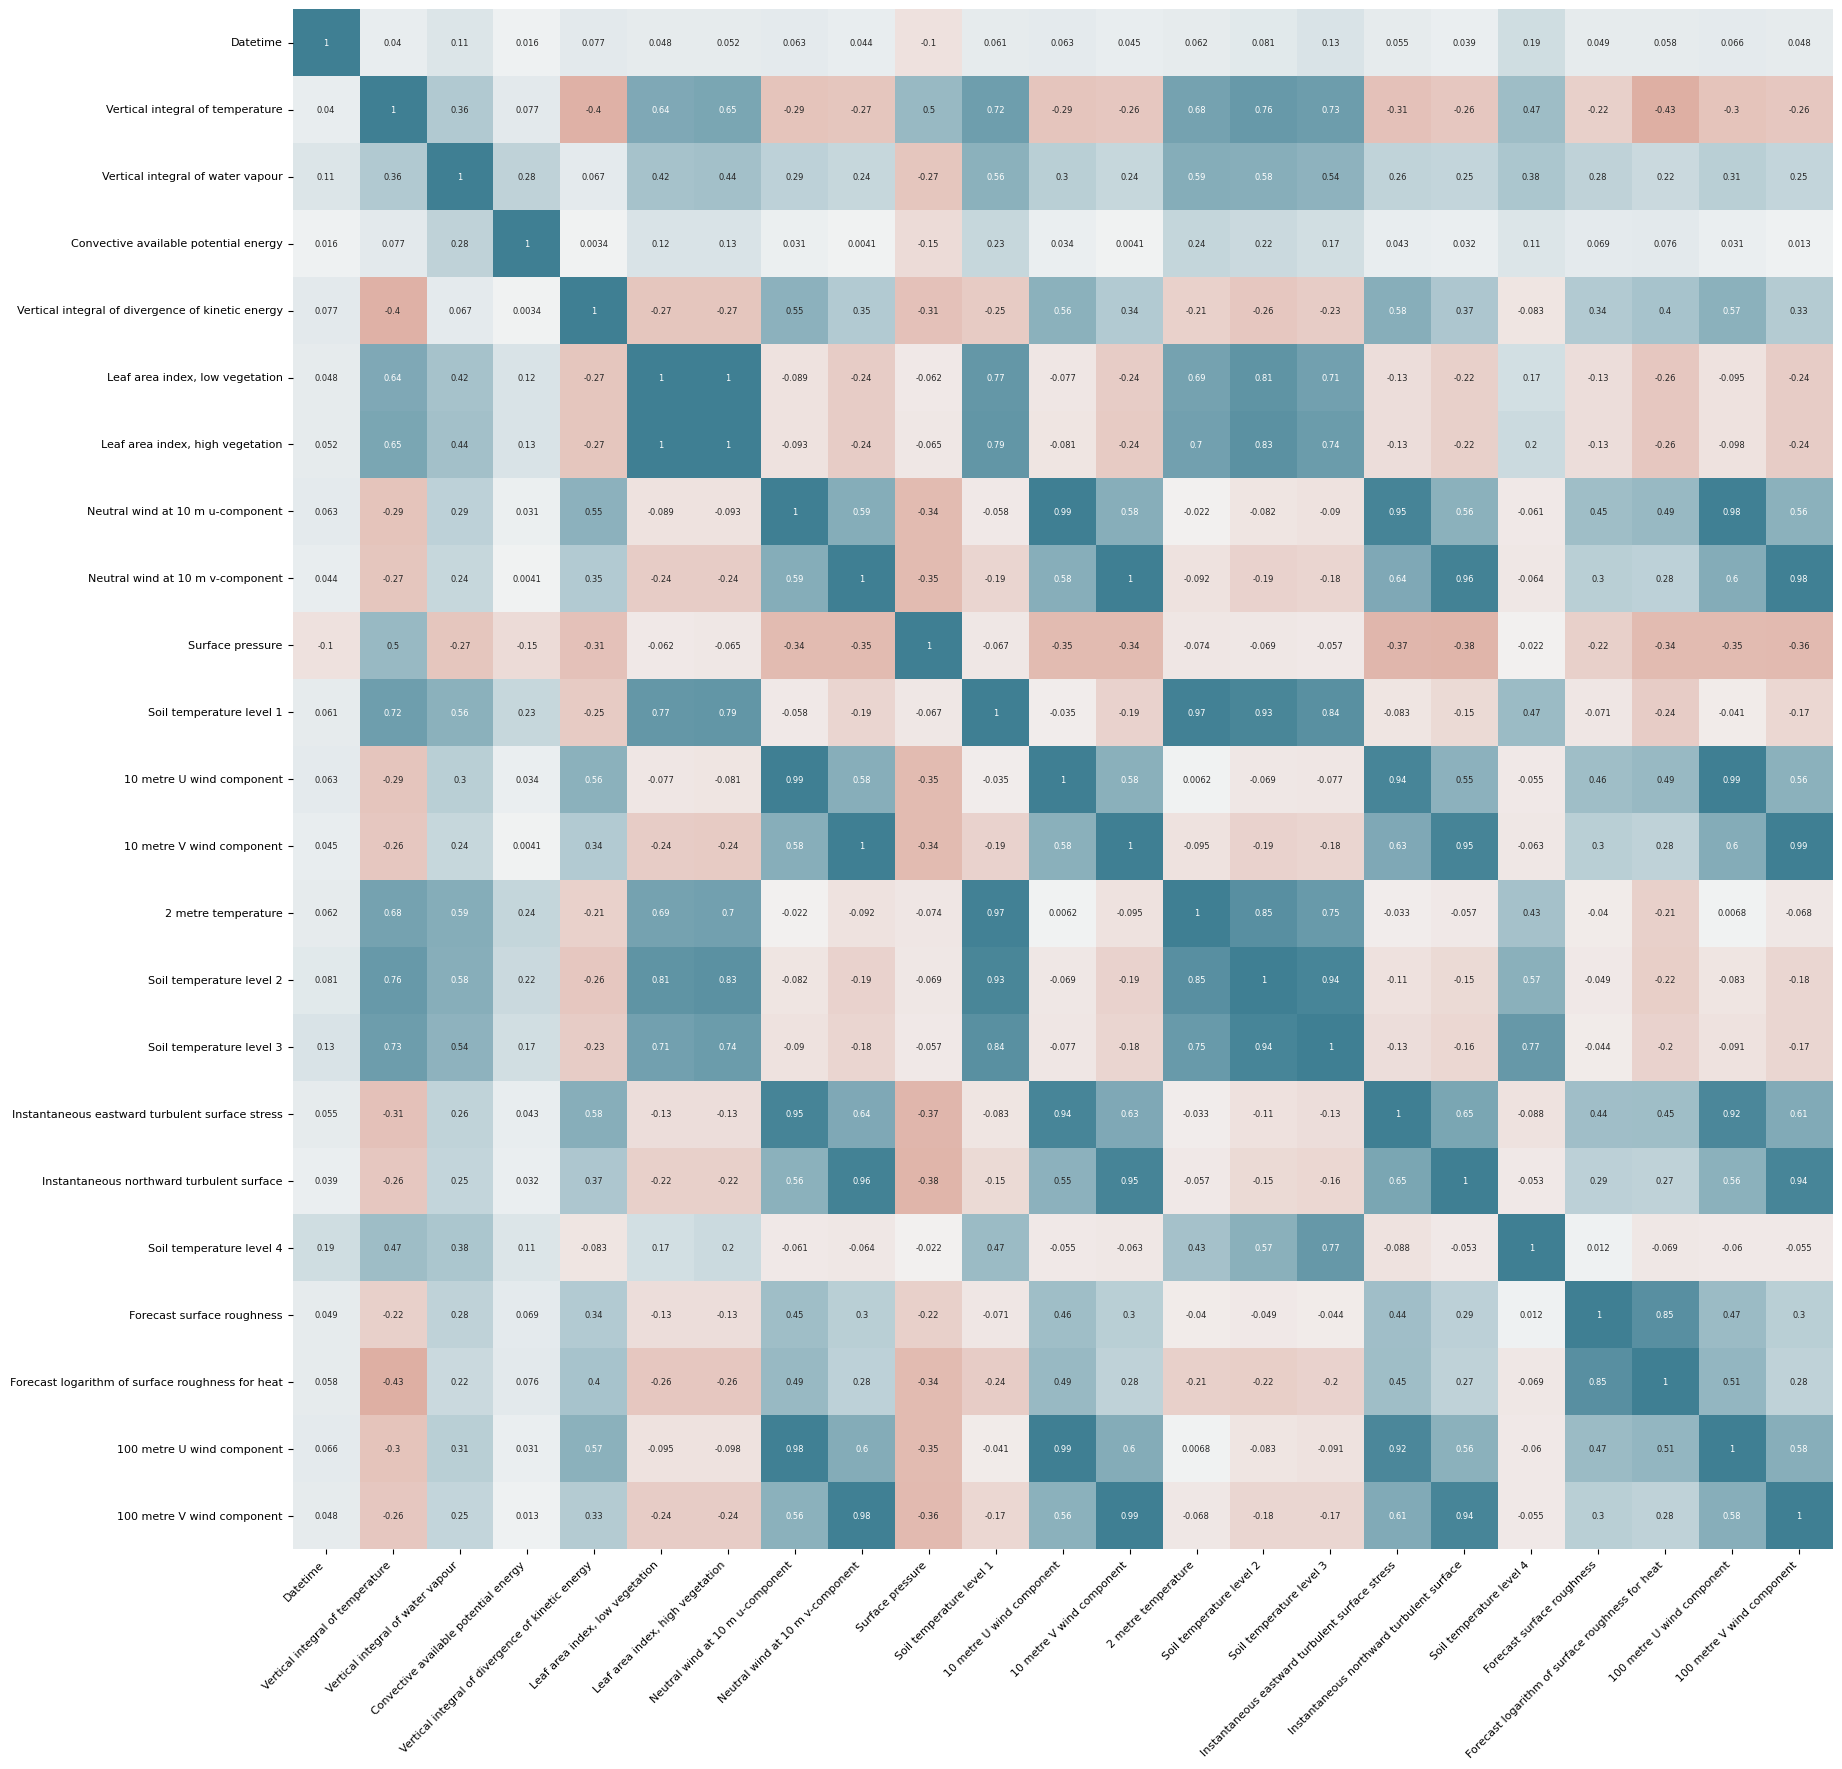

In [464]:
key_corr_matrix = []
for key_corr in keys_x:
    if key_corr not in param_excluded:
      key_corr_matrix.append(key_corr)
key_corr_matrix.append('Energy')
data_corr = wind_ava_sotavento[key_corr_matrix]
matrix_corr = data_corr.select_dtypes(include=[ 'float64', 'datetime64[ns]']).corr(method='pearson')
tidy_corr_matrix(matrix_corr)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(
    matrix_corr,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

# Excluimos las variables con mas correlación

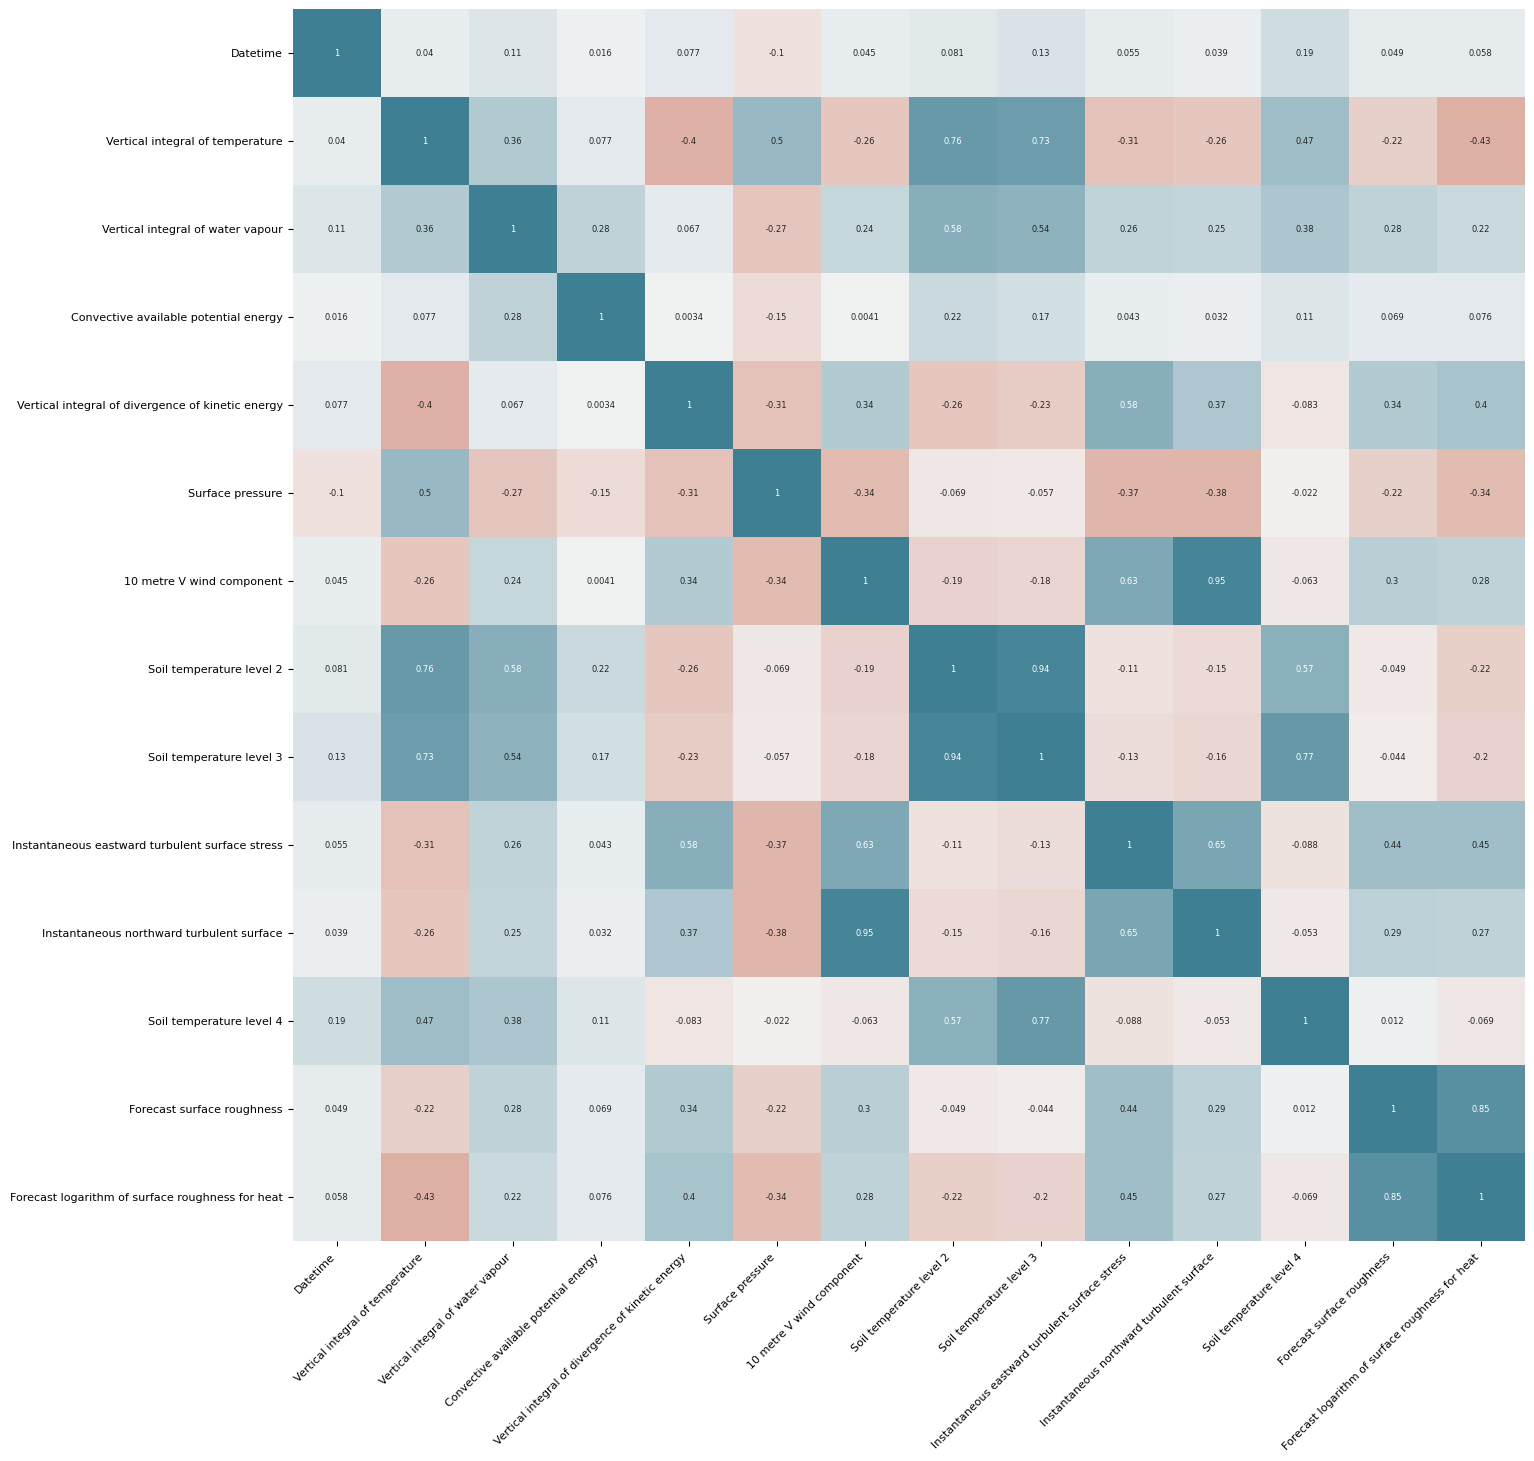

In [469]:
key_corr_matrix = []
for key_corr in keys_x:
  if key_corr not in ['Leaf area index, low vegetation','Leaf area index, high vegetation','Neutral wind at 10 m u-component',
                      '10 metre U wind component','Neutral wind at 10 m u-component' ,'100 metre U wind component','Neutral wind at 10 m v-component', '10 metre V wind component'
                      'Neutral wind at 10 m v-component','100 metre V wind component','Soil temperature level 1','2 metre temperature', 'Energy',]:

      key_corr_matrix.append(key_corr)

data_corr = wind_ava_sotavento[key_corr_matrix]
matrix_corr = data_corr.select_dtypes(include=['float64', 'datetime64[ns]']).corr(method='pearson')
tidy_corr_matrix(matrix_corr)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))

sns.heatmap(
    matrix_corr,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)


# CONSIDERANDO QUE HAY CORRELACION A PARTIR DEL 0.1 PARA QUE SE VEAN LOS DATOS

In [473]:
corr_keys = keys_data.copy()
most_related = []
matrix = wind_ava_sotavento[corr_keys].corr().Energy.sort_values(ascending = False)
for i in corr_keys:
  if (matrix[i] >= 0.1 or matrix[i] <= -0.1) and i != 'Energy':
          most_related.append(i)
print(most_related)
print(len(most_related))

['Vertical integral of temperature', 'Vertical integral of divergence of kinetic energy', 'Leaf area index, low vegetation', 'Leaf area index, high vegetation', 'Neutral wind at 10 m u-component', 'Neutral wind at 10 m v-component', 'Surface pressure', 'Soil temperature level 1', '10 metre U wind component', '10 metre V wind component', '2 metre temperature', 'Soil temperature level 2', 'Soil temperature level 3', 'Instantaneous eastward turbulent surface stress', 'Instantaneous northward turbulent surface', 'Forecast surface roughness', 'Forecast logarithm of surface roughness for heat', '100 metre U wind component', '100 metre V wind component']
19


['Vertical integral of temperature', 'Vertical integral of divergence of kinetic energy', 'Leaf area index, low vegetation', 'Leaf area index, high vegetation', 'Neutral wind at 10 m u-component', 'Neutral wind at 10 m v-component', 'Surface pressure', 'Soil temperature level 1', '10 metre U wind component', '10 metre V wind component', '2 metre temperature', 'Soil temperature level 2', 'Soil temperature level 3', 'Instantaneous eastward turbulent surface stress', 'Instantaneous northward turbulent surface', 'Forecast surface roughness', 'Forecast logarithm of surface roughness for heat', '100 metre U wind component', '100 metre V wind component']


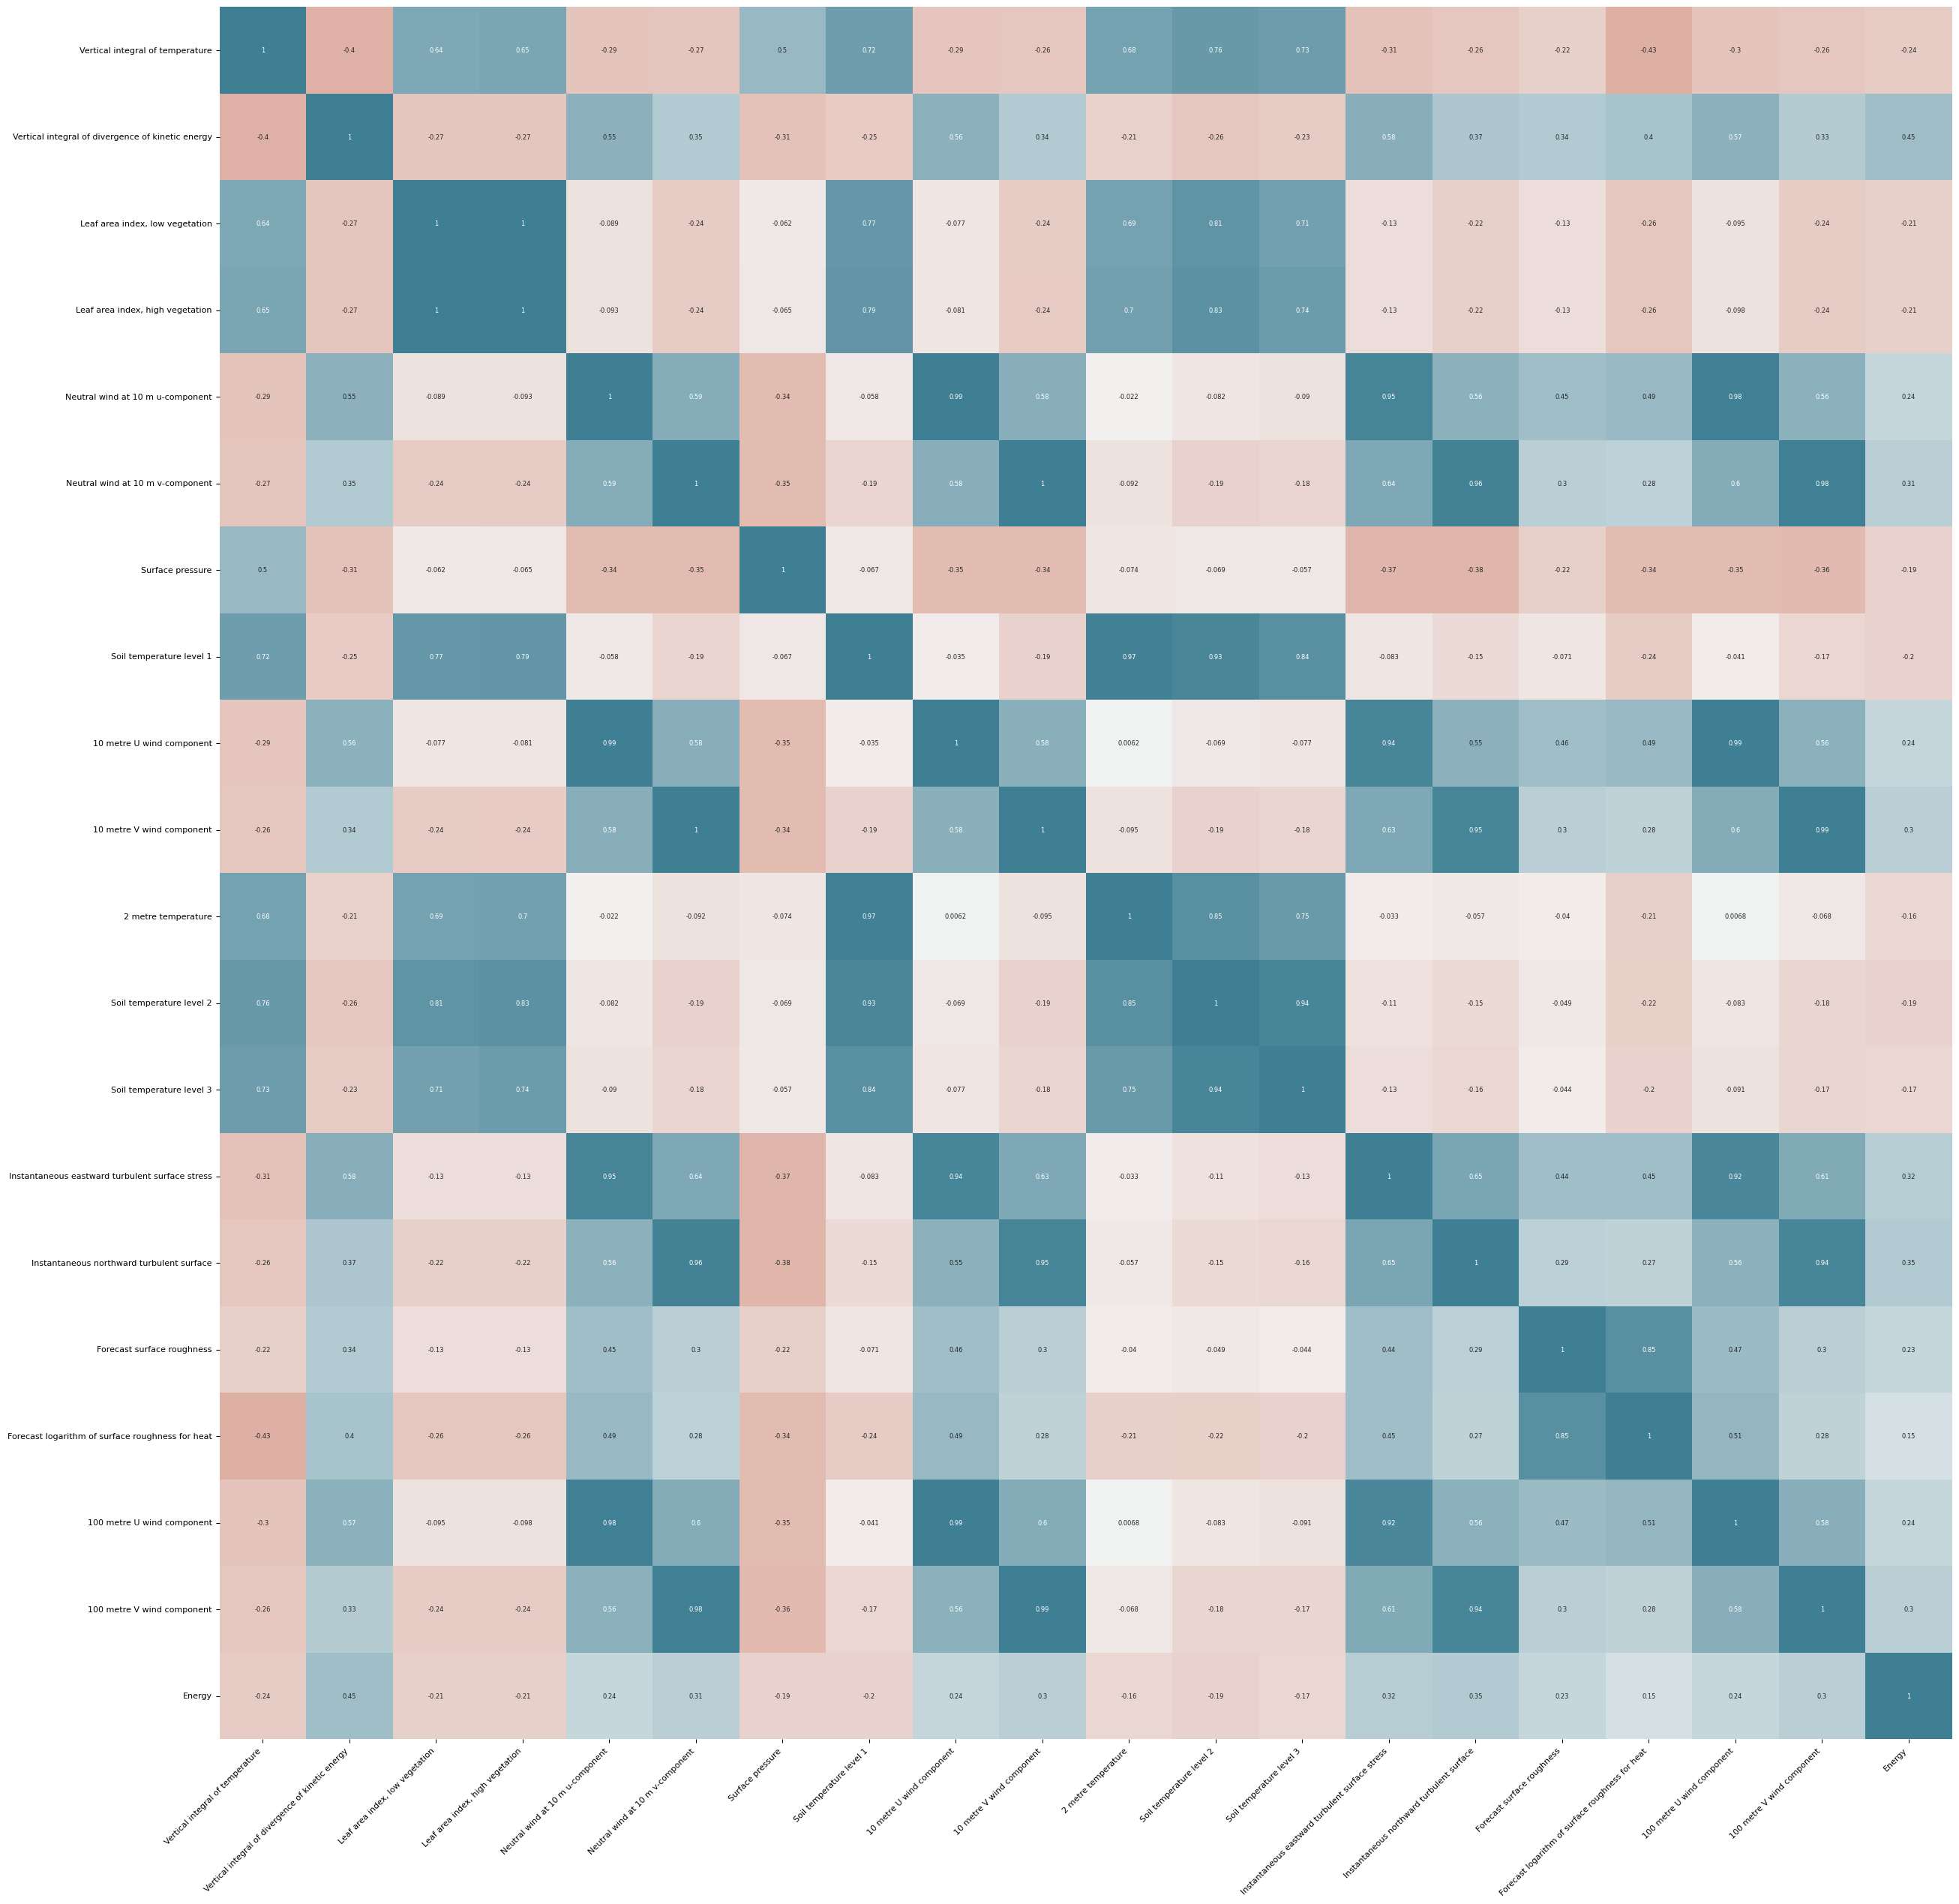

In [474]:
related = most_related.copy()
related.append('Energy')
print(most_related)
data_most_related = wind_ava_sotavento[related]
matrix_corr = data_most_related.select_dtypes(include=[ 'float64', 'datetime64[ns]']).corr(method='pearson')
tidy_corr_matrix(matrix_corr)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))

sns.heatmap(
    matrix_corr,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [475]:
num_related = {}
param_excluded = []
print(most_related)
final_params = related.copy()
final_params.remove('Energy')
for i in final_params:
  num_related[i] = 0
related_params = []

for i in final_params:
  for j in final_params:
    if i !=j and (matrix_corr[i][j] >= 0.95 or matrix_corr[i][j] <= -0.95):
      params = [i,j]
      num_related[i] +=1
      related_params.append(params)
print(related_params)
print(num_related)
for i in final_params:
  if num_related[i] == 0:
    num_related.pop(i)
print(num_related)


while len(related_params) != 0:
  max_related_num = max_related(num_related)
  param_excluded.append(max_related_num)
  num_related.pop(max_related_num)
  related_params = []

  for i in num_related.keys():
    for j in num_related.keys():
      if i !=j and (matrix_corr[i][j] >= 0.95 or matrix_corr[i][j] <= -0.95):
        params = [i,j]
        related_params.append(params)

for i in related:
  if i in param_excluded:
    final_params.remove(i)
print(final_params)

['Vertical integral of temperature', 'Vertical integral of divergence of kinetic energy', 'Leaf area index, low vegetation', 'Leaf area index, high vegetation', 'Neutral wind at 10 m u-component', 'Neutral wind at 10 m v-component', 'Surface pressure', 'Soil temperature level 1', '10 metre U wind component', '10 metre V wind component', '2 metre temperature', 'Soil temperature level 2', 'Soil temperature level 3', 'Instantaneous eastward turbulent surface stress', 'Instantaneous northward turbulent surface', 'Forecast surface roughness', 'Forecast logarithm of surface roughness for heat', '100 metre U wind component', '100 metre V wind component']
[['Leaf area index, low vegetation', 'Leaf area index, high vegetation'], ['Leaf area index, high vegetation', 'Leaf area index, low vegetation'], ['Neutral wind at 10 m u-component', '10 metre U wind component'], ['Neutral wind at 10 m u-component', '100 metre U wind component'], ['Neutral wind at 10 m v-component', '10 metre V wind componen

# TARDA MUCHO

In [476]:
"""fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(24, 20))
axes = axes.flat
contador = 0

for i, column in enumerate(keys_x):
  if (i%5 == 0):
    sns.violinplot(
        x     = column,
        y     = 'Energy',
        data  = wind_ava_sotavento,
        color = "white",
        ax    = axes[contador]
    )
    axes[contador].set_title(f"Energía Solar vs {colum}", fontsize = 7, fontweight = "bold")
    axes[contador].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[contador].tick_params(labelsize = 6)
    axes[contador].set_xlabel("")
    axes[contador].set_ylabel("")
    contador += 1

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de Energía sobre las variables', fontsize = 32, fontweight = "bold");"""

'fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(24, 20))\naxes = axes.flat\ncontador = 0\n\nfor i, column in enumerate(keys_x):\n  if (i%5 == 0):\n    sns.violinplot(\n        x     = column,\n        y     = \'Energy\',\n        data  = wind_ava_sotavento,\n        color = "white",\n        ax    = axes[contador]\n    )\n    axes[contador].set_title(f"Energía Solar vs {colum}", fontsize = 7, fontweight = "bold")\n    axes[contador].yaxis.set_major_formatter(ticker.EngFormatter())\n    axes[contador].tick_params(labelsize = 6)\n    axes[contador].set_xlabel("")\n    axes[contador].set_ylabel("")\n    contador += 1\n\nfig.tight_layout()\nplt.subplots_adjust(top=0.9)\nfig.suptitle(\'Distribución de Energía sobre las variables\', fontsize = 32, fontweight = "bold");'

C:\Users\aitan\AppData\Local\Temp\ipykernel_37740\2738143492.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_por_mes = wind_ava_sotavento.resample('M').mean()


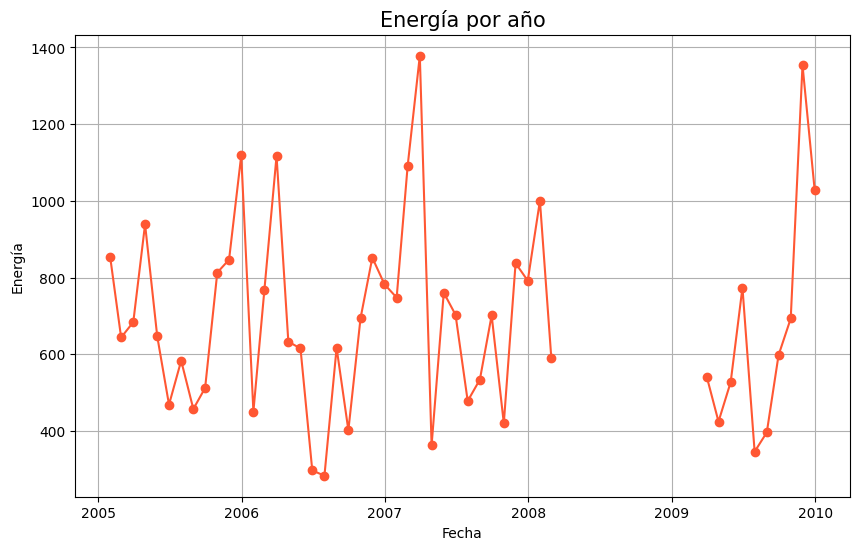

In [477]:
wind_ava_sotavento.set_index('Datetime', inplace=True)
date_por_mes = wind_ava_sotavento.resample('M').mean()

plt.figure(figsize=(10, 6))
plt.plot(date_por_mes.index, date_por_mes['Energy'], label='Energía', marker = 'o', color = '#FF5733')
plt.title('Energía por año', fontsize = 15)
plt.xlabel('Fecha', fontsize = 10)
plt.ylabel('Energía', fontsize = 10)
plt.grid(True)
plt.show()

FIN EDA